<a href="https://colab.research.google.com/github/AzhagurajaR/pdsaw3/blob/main/PDSA_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None
        self._elapsed_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError("Timer is running. Use .stop()")
        self._start_time = time.perf_counter()

    def stop(self):
        """Save the elapsed time and re-initialize timer"""
        if self._start_time is None:
           raise TimerError("Timer is not running. Use .start()")
        self._elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None

    def elapsed(self):
        """Report elapsed time"""
        if self._elapsed_time is None:
           raise TimerError("Timer has not been run yet. Use .start()")
        return(self._elapsed_time)

    def __str__(self):
        """print() prints elapsed time"""
        return(str(self._elapsed_time))

In [ ]:
import sys
sys.setrecursionlimit(2**31-1)

In [ ]:
def quicksort(L,l,r): # Sort L[l:r]
    if (r - l <= 1):
        return L
    (pivot,lower,upper) = (L[l],l+1,l+1)
    for i in range(l+1,r):
        if L[i] > pivot: # Extend upper segment
            upper = upper+1
        else: # Exchange L[i] with start of upper segment
            (L[i], L[lower]) = (L[lower], L[i])
            # Shift both segments
            (lower,upper) = (lower+1,upper+1)
    # Move pivot between lower and upper
    (L[l],L[lower-1]) = (L[lower-1],L[l])
    lower = lower-1
    # Recursive calls
    quicksort(L,l,lower)
    quicksort(L,lower+1,upper)
    return(L)

In [ ]:
qlist = [1,3,5,0,2,4,17,2,-5,6,4,3]
qnew = quicksort(qlist, 0, 12)
print(qlist, qnew)

[-5, 0, 1, 2, 2, 3, 3, 4, 4, 5, 6, 17] [-5, 0, 1, 2, 2, 3, 3, 4, 4, 5, 6, 17]


In [ ]:
import random
random.seed(2021)
inputlists = {}
inputlists['random'] = [random.randrange(100000000) for i in range(1000000)]
inputlists['ascending'] = [i for i in range(10000)]
inputlists['descending'] = [i for i in range(9999, -1, -1)]
t = Timer
for k in inputlists.keys():
    templists = inputlists[k][:]
    t.start()
    quicksort(templists, 0, len(templists))
    t.stop()
    print(k,t)

TypeError: ignored

In [ ]:
def merge(A,B):
    (m,n) = (len(A),len(B))
    (C,i,j) = ([],0,0)
    while i < m and j < n:
        if A[i] <= B[j]:
            C.append(A[i])
            i += 1
        else:
            C.append(B[j])
            j += 1
    while i < m:
        C.append(A[i])
        i += 1
    while j < n:
        C.append(B[j])
        j += 1
    return C

In [ ]:
def mergesort(A):
    n = len(A)
    if n <= 1:
        return(A)
    L = mergesort(A[:n//2])
    R = mergesort(A[n//2:])
    B = merge(L,R)
    return(B)

In [ ]:
import random
random.seed(2021)
inputlists = {}
inputlists['random'] = [random.randrange(100000000) for i in range(1000000)]
inputlists['ascending'] = [i for i in range(10000)]
inputlists['descending'] = [i for i in range(9999, -1, -1)]
t = Timer
for k in inputlists.keys():
    templists = inputlists[k][:]
    t.start()
    mergesort(templists)
    t.stop()
    print(k,t)

# Correct implementation of code for PDSA Week3 Grpa1

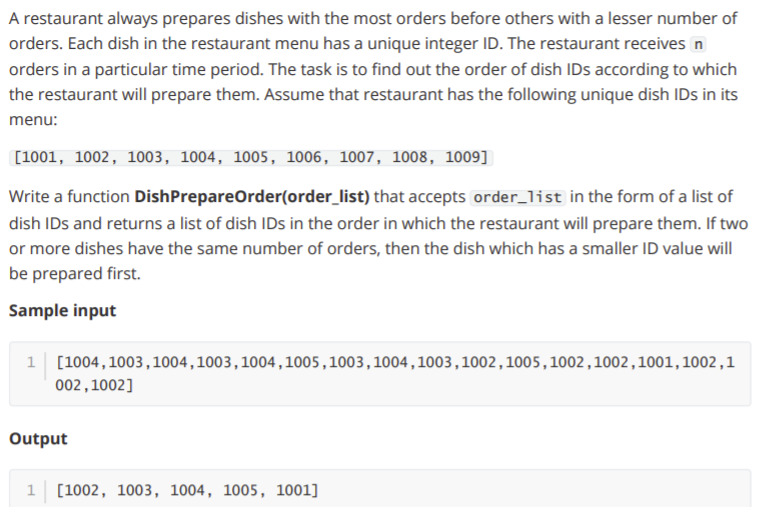

In [ ]:
def DishPrepareOrder(orderlist):
    d = {i:orderlist.count(i) for i in orderlist} # iterating and counting number of item in 'orderlist' and converting to dictionary

    l = sorted(d.items(), key=lambda x: x[1], reverse=True) # convert dictionary into tuple of list as (key, value) sorted by value

    for i in range(len(l)-1):
        for j in range(i+1, len(l)):
            if l[i][1] == l[j][1] and l[i][0] > l[j][0]: # checking value in tuble and key then swaping if conditin satisfies
                t = l[i]
                l[i] = l[j]
                l[j] = t
    return [i[0] for i in l] # iterate list and appending first value in tuple of list l

In [ ]:
DishPrepareOrder([1006, 1008, 1009, 1008, 1007, 1005, 1008, 1001, 1003, 1009, 1006, 1003, 1004, 1002, 1008, 1005, 1004, 1007, 1006, 1002, 1002, 1001, 1004, 1001, 1003, 1007, 1007, 1005, 1004, 1002])

[1002, 1004, 1007, 1008, 1001, 1003, 1005, 1006, 1009]

All public and private test cases are passed

In [ ]:
def find_Min_Difference(L,P):
  L.sort() # List is sorted
  N = P # Subset size
  M = len(L) # length of L
  min_diff = max(L) - min(L)
  for i in range(M-N+1):
    if L[i+N-1] - L[i] < min_diff:
      min_diff = L[i+N-1] - L[i]
  return min_diff

# PDSA Week3 Grp2

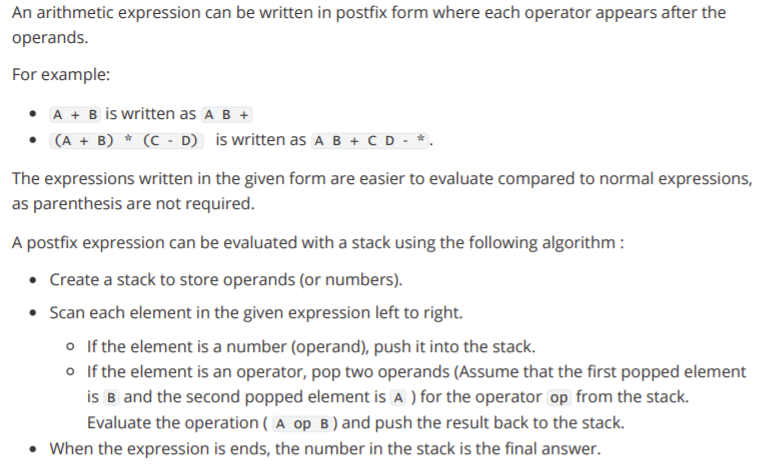

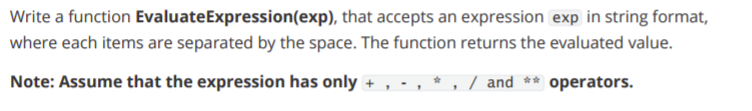

In [ ]:
def EvaluateExpression(exp):
    d = []
    stm = ''
    for i in range(len(exp)):
        stm += exp[i]
        if exp[i] == ' ' and i < len(exp)-1:
            d.append(stm[:-1])
            stm = ''
        elif i == len(exp)-1:
            d.append(stm)
    s = []
    for i in d:
        if i.isnumeric():
            s.append(i)
        elif i == '*':
            a = s.pop()
            b = s.pop()
            s.append(int(a) * int(b))
        elif i == '+':
            x = s.pop()
            y = s.pop()
            s.append(int(x) + int(y))
        elif i == '-':
            x1 = s.pop()
            x2 = s.pop()
            s.append(int(x2) - int(x1))
        elif i == '/':
            y1 = s.pop()
            y2 = s.pop()
            s.append(int(y2) / int(y1))
        elif i == '**':
            y1 = s.pop()
            y2 = s.pop()
            s.append(int(y2) ** int(y1))
    return s[0]

In [ ]:
st = '2 3 1 * + 3 **'

In [ ]:
EvaluateExpression(st)

125

In [ ]:
EvaluateExpression('100 200 + 2 / 5 * 7 +')

757

All public test cases and 3 out of 4 private test cases passed

# Quick sort algorithm

In [ ]:
def quicksort(L,l,r): # Sort L[l:r]
    if (r - l <= 1):
        return L
    (pivot,lower,upper) = (L[l],l+1,l+1)
    for i in range(l+1,r):
        if L[i] > pivot: # Extend upper segment
            upper = upper+1
        else: # Exchange L[i] with start of upper segment
            (L[i], L[lower]) = (L[lower], L[i])
            # Shift both segments
            (lower,upper) = (lower+1,upper+1)
    # Move pivot between lower and upper
    (L[l],L[lower-1]) = (L[lower-1],L[l])
    lower = lower-1
    # Recursive calls
    quicksort(L,l,lower)
    quicksort(L,lower+1,upper)
    return(L)

# Quick sort other implementation

In [ ]:
def partition(L,lower,upper):
  # we are selecting first element as a pivot
  pivot = L[lower]
  i = lower
  for j in range(lower+1,upper+1):
    if L[j] <= pivot:
      i += 1
      L[i],L[j] = L[j],L[i]
  L[lower],L[i]= L[i],L[lower]
  #returning the position of pivot
  return i

def quicksort(L,lower,upper):
  if(lower < upper):
    pivot_pos = partition(L,lower,upper);
    # calling the quick sort on leftside part of pivot
    quicksort(L,lower,pivot_pos-1)
    # calling the quick sort on rightside part of pivot
    quicksort(L,pivot_pos+1,upper)
  return L

# Using one class- Recursively

In [ ]:
class Node:
    def __init__(self, v = None):
        self.value = v
        self.next = None
        return
    def isempty(self):
        if self.value == None:
            return(True)
        else:
            return(False)
    #recursive
    def append(self,v):
        if self.isempty():
            self.value = v
        elif self.next == None:
            self.next = Node(v)
        else:
            self.next.append(v)
        return
    # append, iterative
    def appendi(self,v):
        if self.isempty():
            self.value = v
            return
        temp = self
        while temp.next != None:
            temp = temp.next
        temp.next = Node(v)
        return
    def insert(self,v):
        if self.isempty():
            self.value = v
            return
        newnode = Node(v)
        # Exchange values in self and newnode
        (self.value, newnode.value) = (newnode.value, self.value)
        # Switch links
        (self.next, newnode.next) =(newnode, self.next)
        return
    # delete, recursive
    def delete(self,v):
        if self.isempty():
            return
        if self.value == v:
            self.value = None
            if self.next != None:
                self.value = self.next.value
                self.next = self.next.next
            return
        else:
            if self.next != None:
                self.next.delete(v)
                if self.next.value == None:
                    self.next = None
        return
    def display(self):
        if self.isempty()==True:
            print('None')
        else:
            temp = self
            while temp!=None:
                print(temp.value,end="  ")
                temp = temp.next

In [ ]:
head = Node(10)
head.display()

10  

In [ ]:
head.append(20)
head.display()

10  20  

In [ ]:
head.append(30)
head.display()

10  20  30  

In [ ]:
head.appendi(40)
head.display()

10  20  30  40  

In [ ]:
head.appendi(50)
head.display()

10  20  30  40  50  

In [ ]:
head.delete(30)
head.display()

10  20  40  50  

# Using two classes

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
class LinkedList:
    def __init__(self):
        self.head = None
    def isempty(self):
        if self.head == None:
            return True
        else:
            return False
    def append(self,data):
        # If list is empty
        if self.isempty():
            self.head=Node(data)
        else:
            temp = self.head
            while temp.next != None:
                temp = temp.next
            temp.next = Node(data)
    def delete(self,v):
        # If list is empty
        if self.isempty()==True:
            return 'List is empty'
        # if list have only one element and equal to v
        elif self.head.next==None:
            if self.head.data==v:
                self.head = None
            else:
                return 'Not exist'
        else:
            temp = self.head
            temp1 = self.head
            while temp.next!= None and temp.data != v:
                temp1 = temp
                temp = temp.next
            if temp.data==v and temp==self.head:
                self.head = temp.next
            elif temp.data==v:
                temp1.next= temp.next
            else:
                return 'Not exist'
    def operation(head):
        stack = []
        temp = head
        isoperation = True
        while temp != None:
            stack.append(temp.data)
            temp = temp.next
        while head != None:
            i = stack.pop()
            if head.data == i:
                isoperation = True
            else:
                isoperation = False
                break
            head = head.next
        return isoperation
    def display(self):
        if self.isempty()==True:
            print('None')
        else:
            temp = self.head
            while temp!=None:
                print(temp.data,end="  ")
                temp = temp.next

In [ ]:
pl = LinkedList()

In [ ]:
pl.isempty()

True

In [ ]:
pl.append(1)
pl.append(2)
pl.append(3)
pl.append(4)
pl.append(5)

In [ ]:
pl.operation()

AttributeError: ignored

In [ ]:
b = [1,2,3,4]

In [ ]:
del(b[0])

In [ ]:
b

[2, 3, 4]

In [ ]:
class Node:
    def __init__(self, v=None):
        self.value = v
        self.next = None

    def isempty(self):
        if self.value = None:
            return True
        else:
            return False

In [ ]:
def partition(Array, low, up):
    i = low + 1
    j = up
    pivot = Array[low]
    while(i<=j):
        while (Array[i]<pivot and i < up):
            i = i + 1
        while (Array[j] > pivot):
            j = j - 1

        if i < j:
            Array[i], Array[j] = Array[j], Array[i]
            i = i + 1
            j = j -1
        else:
            i = i + 1
    Array[low] = Array[i]
    Array[j] = pivot
    return Array

In [ ]:
partition([13, 18, 8, 10, 21, 7, 2, 32, 6, 19], 0, 9)

[32, 6, 8, 10, 2, 13, 21, 32, 18, 19]

In [ ]:
sorted([7,3,9,2,5,7,2,0])

[0, 2, 2, 3, 5, 7, 7, 9]

In [ ]:
L = [32, 6, 8, 10, 2, 13, 21, 32, 18, 19]

In [ ]:
L.pop(-2) + L.pop(-1)

37

In [ ]:
[23, 34].pop(-1) + [38, 40].pop(-2)

72

In [ ]:
type('4')

str

In [ ]:
def EvaluateExpression(string):
    (stack, l) = ([], [])
    num = ''
    for i in range(len(string)):
        if string[i].isnumeric():
            num += string[i]
        if string[i] == ' ' and num != '':
            l.append(int(num))
            num = ''
        elif string[i] == '*' and i<len(string)-2:
            if string[i+1] == '*' and i+1<=len(string)-1:
                l.append('**')
            elif string[i-1] != '*':
                l.append('*')
        elif string[i] == '+' or string[i] =='-' or string[i] == '/':
            l.append(string[i])
    if string[-2] == '*' and string[-1] == '*':
        l.append('**')
    elif string[-2] != '*' and string[-1] == '*':
        l.append('*')

    for i in range(len(l)):
        if l[i] not in ['+', '-', '*', '/', '**']:
            stack.append(l[i])
        elif l[i] == '+':
            stack.append(stack.pop(-2) + stack.pop(-1))
        elif l[i] == '-':
            stack.append(stack.pop(-2) - stack.pop(-1))
        elif l[i] == '*':
            stack.append(stack.pop(-2) * stack.pop(-1))
        elif l[i] == '/':
            stack.append(stack.pop(-2) / stack.pop(-1))
        elif l[i] == '**':
            stack.append(stack.pop(-2) ** stack.pop(-1))
    return stack[0]

In [ ]:
EvaluateExpression('2 3 1 * + 9 -')

-4

In [ ]:
EvaluateExpression('100 200 + 2 / 5 * 7 +')

757.0

In [ ]:
EvaluateExpression('3 7 + 12 2 - *')

100

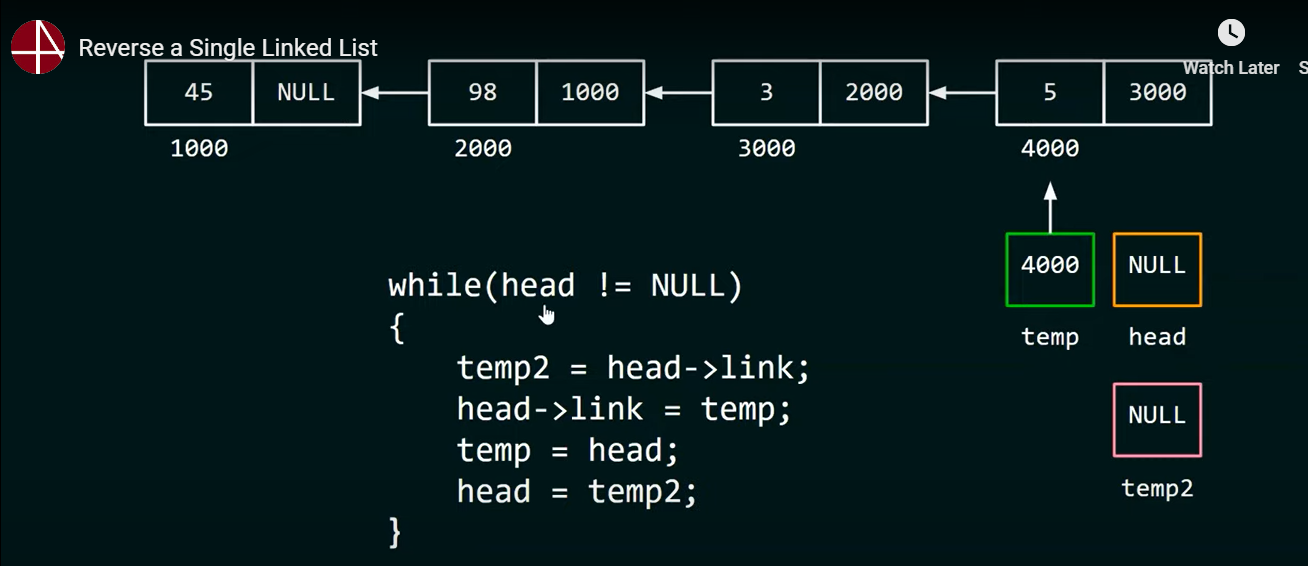

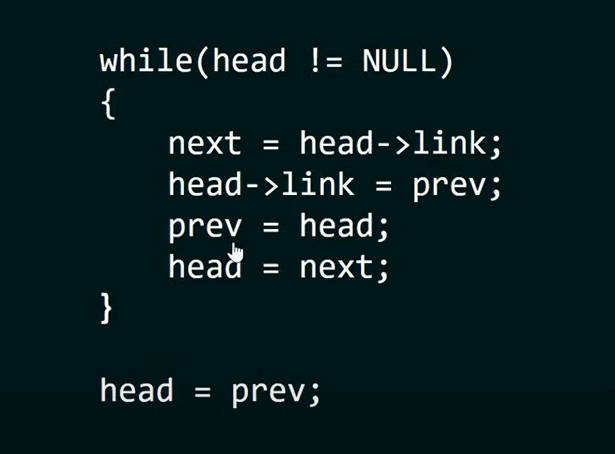

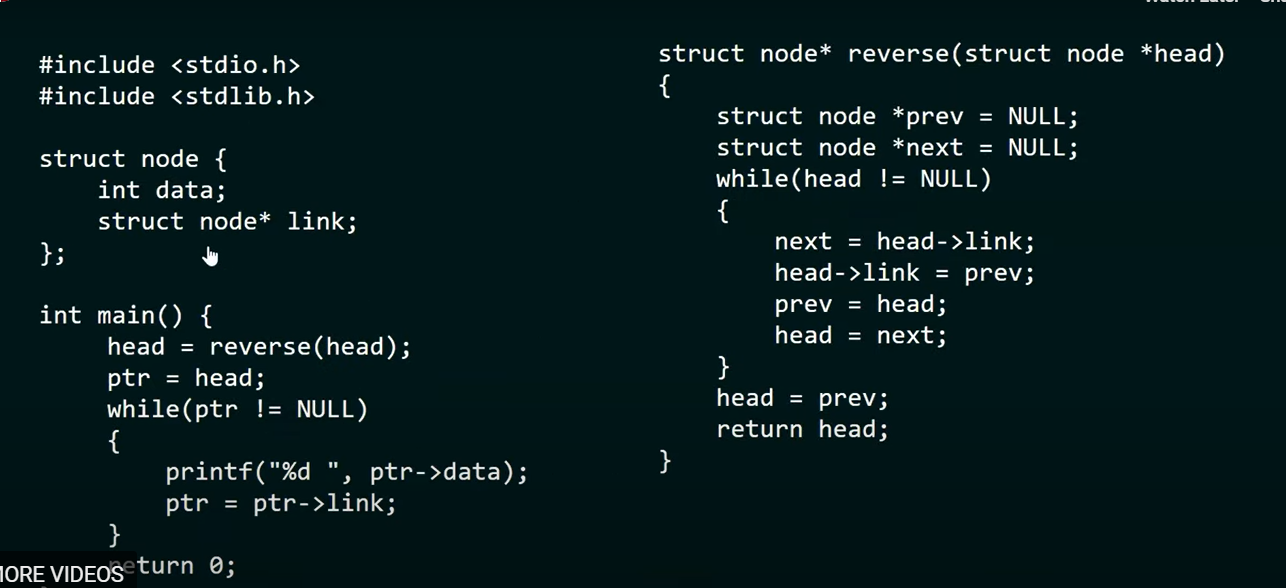

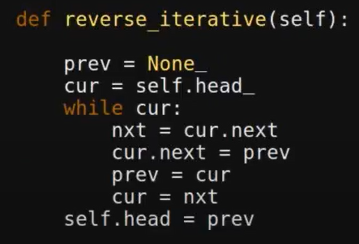

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
        self.flag = False
    def detect_loop(h):
        while (h!=None):
            if (h.flag == True):
                return True
            h.flag = True
            h = h.next
        return False

In [ ]:
def kthsmallest(L, k):
    ''' L should have distinct integer values and k should be between 1 to len(L)'''
    n = len(L)
    if k > n:
        return L[n -1]
    v = L[0]
    LL = [ L[j] for j in range(0, n) if L[j] < v]
    Lv = [ L[j] for j in range(0, n) if L[j] == v]
    LR = [ L[j] for j in range(0, n) if L[j] > v]
    if len(LL) >= k:
        return kthsmallest(LL, k)
    if (len(LL) + len(Lv)) >= k:
        return v
    return kthsmallest(LR, k - (len(LL) + len(Lv)))

In [ ]:
kthsmallest([11,5,8,4,9,3,12,7], 5)

8

In [ ]:
print([3,5,8,4,9,3,0,5].sort())

None


In [ ]:
def rev(L, i, j):
    m = L[i:j+1][::-1]
    return L[:i] + m + L[j+1:]

In [ ]:
rev([0,1,2,3,4,5,6,7],3,6)

[0, 1, 2, 6, 5, 4, 3, 7]

In [ ]:
def rev(L,i,m):
    R = L[i:m+1][::-1]
    k = i
    for e in R:
        L[k] = e
        k += 1
    return L

In [ ]:
def mystery(L):
    m = 0
    n = len(L)
    for i in range(0, n):
        m = i
        for j in range(i, n):
            if (L[j] > L[m]):
                m = j
        L = rev(L, i, m)
    return L

In [ ]:
mystery([1,3,5,2,6,4])

[6, 5, 4, 3, 2, 1]

In [ ]:
mystery([10,11,12,13,14,15,16,17])

[17, 16, 15, 14, 13, 12, 11, 10]

In [ ]:
s = 0
for i in range(57):
    if i%2 == 1:
        s = s + i
print(s)

784
